In [1]:
from pytriqs.gf.local import *
from pytriqs.archive import *
from pytriqs.plot.mpl_interface import *
%matplotlib inline

In [2]:
ar = HDFArchive('anderson_segment_0.5.block.h5','r')
g_ctseg = ar['G_tau']
nn_ctseg = ar['nn']
nnt_ctseg = ar['nn_tau']
nnw_ctseg = ar['nn_iw']

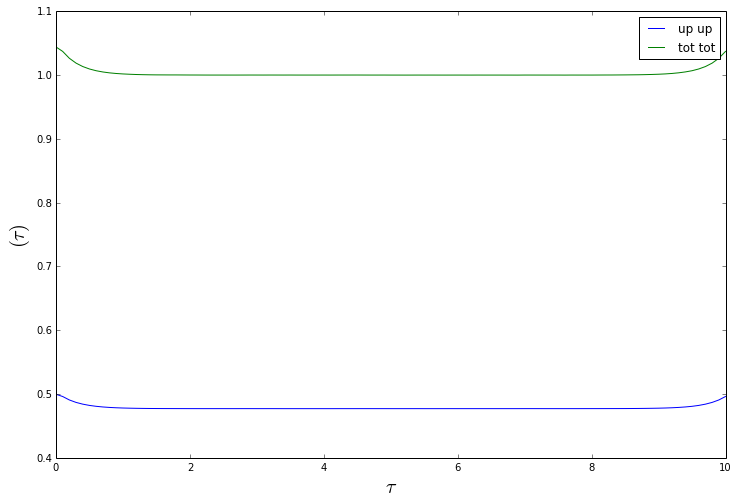

In [3]:
oplot((nnt_ctseg[0,0]).real,label='up up')
oplot((nnt_ctseg[0,0]+nnt_ctseg[0,1]+nnt_ctseg[1,0]+nnt_ctseg[1,1]).real, label='tot tot')

In [8]:
ar = HDFArchive('cyclic/anderson_0.5.block.h5','r')
g_cthyb = ar['G_tau']
nn_cthyb = ar['correlator']
nn_iw_cthyb = ar['correlator_iw']

ar2 = HDFArchive('non_cyclic/anderson_0.5.block.h5','r')
g_cthyb2 = ar2['G_tau']
nn_cthyb2 = ar2['correlator']
nn_iw_cthyb2 = ar2['correlator_iw']

# G_tau comparison -- true measure and sliding measure

(-3, 0)

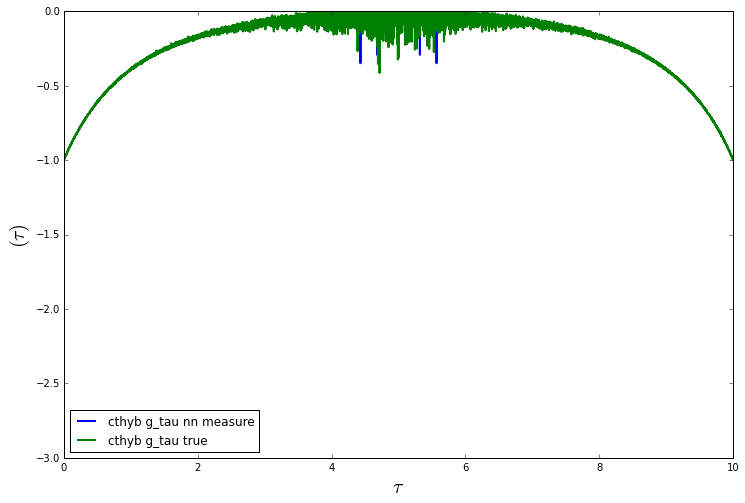

In [7]:
oplot(nn_cthyb.real, linewidth=2, label='cthyb g_tau nn measure')
oplot((g_cthyb['up']+g_cthyb['dn']).real, linewidth=2, label='cthyb g_tau true')

#oplot((g_ctseg['up']+g_ctseg['dn']).real, linewidth=2, label='ctseg')
plt.legend(loc=3)
plt.ylim(-3,0)

# nn measure

(-1, 1)

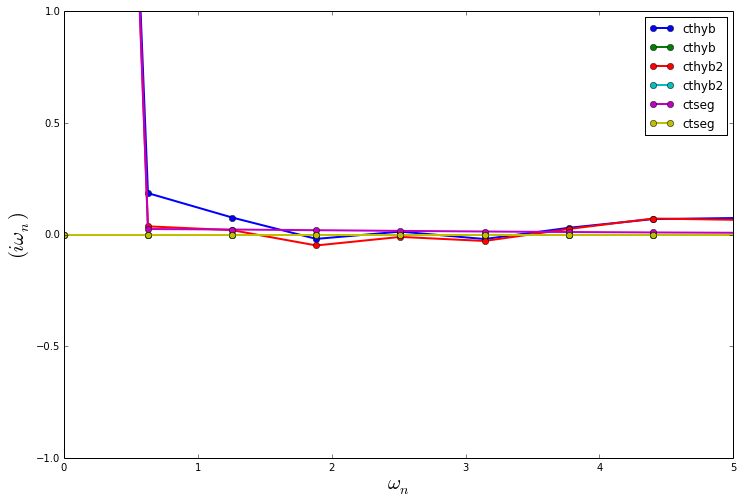

In [9]:
nnw_cthyb = nnw_ctseg[0,0].copy()
nnw_cthyb << Fourier(nn_cthyb)
nnw_cthyb2 = nnw_ctseg[0,0].copy()
nnw_cthyb2 << Fourier(nn_cthyb2)
oplot(nnw_cthyb,'o-',label='cthyb',linewidth=2)
oplot(nnw_cthyb2,'o-',label='cthyb2',linewidth=2)
oplot((nnw_ctseg[0,0]+nnw_ctseg[0,1]+nnw_ctseg[1,0]+nnw_ctseg[1,1]),'o-',label='ctseg',linewidth=2)
plt.xlim(0,5)
plt.ylim(-1,1)

(0.0, 1.5)

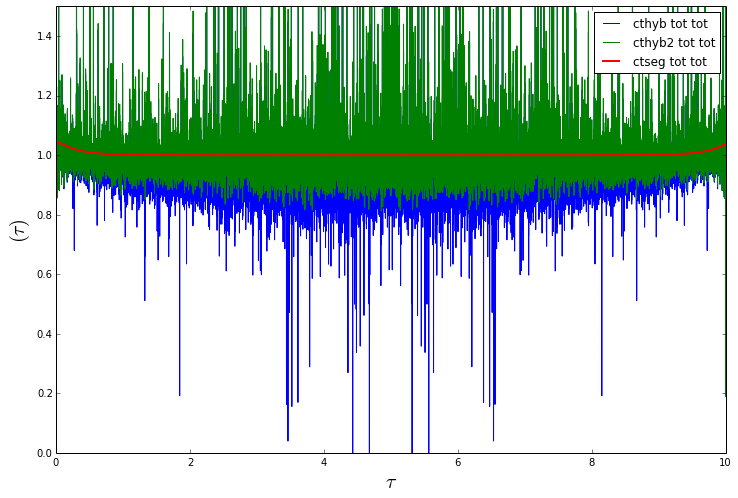

In [12]:
oplot(nn_cthyb.real, label='cthyb tot tot')
oplot(nn_cthyb2.real, label='cthyb2 tot tot')
#oplot((nn_cthyb-nn_cthyb2).real, label='diff')
#oplot((nnt_ctseg[0,0]).real,label='ctseg up up',linewidth=2)
oplot((nnt_ctseg[0,0]+nnt_ctseg[0,1]+nnt_ctseg[1,0]+nnt_ctseg[1,1]).real, label='ctseg tot tot', linewidth=2)
plt.ylim(0.0,1.5)

In [ ]:
import numpy as np
dat = np.genfromtxt('cyclic/histo_binned_taus.dat')
dat2 = np.genfromtxt('non_cyclic/histo_binned_taus.dat')
plt.plot(dat[:,0],dat[:,1],label='cyclic')
plt.plot(dat2[:,0],dat2[:,1],label='noncyclic')
plt.xlim(0,10)
plt.legend(loc=3)

# beta comparison

In [ ]:
import numpy as np

In [ ]:
with HDFArchive('non_cyclic/beta1/anderson_0.5.block.h5','r') as ar:
    g_cthyb_b1 = ar['G_tau']
    nn_cthyb_b1 = ar['correlator']
    nn_iw_cthyb_b1 = ar['correlator_iw']
    
with HDFArchive('non_cyclic/beta10/anderson_0.5.block.h5','r') as ar:
    g_cthyb_b10 = ar['G_tau']
    nn_cthyb_b10 = ar['correlator']
    nn_iw_cthyb_b10 = ar['correlator_iw']
    
with HDFArchive('non_cyclic/beta100/anderson_0.5.block.h5','r') as ar:
    g_cthyb_b100 = ar['G_tau']
    nn_cthyb_b100 = ar['correlator']
    nn_iw_cthyb_b100 = ar['correlator_iw']

In [ ]:
plt.plot(np.array(list(g_cthyb_b1.mesh)),g_cthyb_b1['up'].data[:,0,0], label='cthyb b1')
plt.plot(np.array(list(g_cthyb_b10.mesh))/10.,g_cthyb_b10['up'].data[:,0,0], label='cthyb b10')
plt.plot(np.array(list(g_cthyb_b100.mesh))/100.,g_cthyb_b100['up'].data[:,0,0], label='cthyb b100')
#oplot(nn_cthyb_b10, label='cthyb b10')
#oplot((nnt_ctseg[0,0]+nnt_ctseg[0,1]+nnt_ctseg[1,0]+nnt_ctseg[1,1]).real, label='ctseg tot tot', linewidth=2)
plt.ylim(-2,0.1)

In [ ]:
plt.plot(np.array(list(nn_cthyb_b1.mesh)),nn_cthyb_b1.data[:,0,0], label='cthyb b1')
plt.plot(np.array(list(nn_cthyb_b10.mesh))/10.,nn_cthyb_b10.data[:,0,0], label='cthyb b10')
plt.plot(np.array(list(nn_cthyb_b100.mesh))/100.,nn_cthyb_b100.data[:,0,0], label='cthyb b100')
#oplot(nn_cthyb_b10, label='cthyb b10')
#oplot((nnt_ctseg[0,0]+nnt_ctseg[0,1]+nnt_ctseg[1,0]+nnt_ctseg[1,1]).real, label='ctseg tot tot', linewidth=2)
plt.ylim(0,15)

In [ ]:
pert_b1 = np.genfromtxt('non_cyclic/beta1/histo_pert_order.dat')
plt.plot(pert_b1[:,0],pert_b1[:,1],label = 'b1')
pert_b10 = np.genfromtxt('non_cyclic/beta10/histo_pert_order.dat')
plt.plot(pert_b10[:,0],pert_b10[:,1],label = 'b10')
pert_b100 = np.genfromtxt('non_cyclic/beta100/histo_pert_order.dat')
plt.plot(pert_b100[:,0],pert_b100[:,1],label = 'b100')
plt.xlim(0,40)
plt.legend()